# I Pakartoniniai neuroniniai tinklai

## Temos

<code>**1  : Įvairūs darbo su tekstiniais duomenimis metodai**</code><br>
<code>**2  : Sekos modeliavimas su RNN**</code><br>
<code>**3  : Įvairių tipų sekos modeliavimo užduotys**</code><br>
<code>**4  : Atgalinis skaičiavimas (backpropagation) per laiką**</code><br>
<code>**5  : LSTM - ilgalaikė trumpalaikė atmintis**</code><br>
<code>**6  : RNN klasifikavimui: Many to One Word RNN**</code><br>
<code>**7  : Sentimentų klasifikatorius (PyTorch)**</code><br>

In [1]:
#TODO approx 2:20

Tai specialaus tipo neurininiai tinklai kurie gali modeluoti duomenų serijas. Vienas turbūt idomesniu pavyzdžių būtų NLP (natural language processing), galima galvoti apie dokumentą kaip apie žodžių serija, ir kiekvienas žodis taip pat yra simbolių serija. Aptarsime šioje paskaitoje kaip šie NN veikia ir paskaitos pabaigoje pamėginsime `pritaikyti RNN dokumentų klasifikacijos problemai spręsti`. Žinoma jeigu jus domina darbas su tekstu RNNs nėra vienintelis būdas dirbti su teksto problemomis. Todėl paskaitos eigoje paminėsiu trumpai kelis kitus būdus šioms problemoms spręsti. Aptarsime skirtingas `sekos modeliavimo technika`s nes yra daugiau nei tekstos klasifikcija. Pasižiūrėsime į `modifikuota atgalinį skaičiavimą` pritaikyta šio tipo neuroniniams tinklams. Akcentuosiu `LTSM` tai specifinė celė skirta RNNs kurios padeda apdoroti ilgas sekas. Susipažinsime su technika kuomet norime klasifikuoti tekstą pritaikytdami `many-to-one` metodą.

## Įvairūs darbo su tekstiniais duomenimis metodai

### Bag of words

Klasikinis priėmimas prie teksto klasifikavimo problemos `bag of words model`. Mes tik apžvelksime čia technika bet nesigilinsime į šio metodo veikimo aspektus.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np

In [14]:
x1 = 'The sun is shinning'
x2 = 'The weather is sweet'
x3 = 'The sun is shinning, the weather is sweet, and one and one is two '

In [15]:
y = [0, 1, 0]

Šio metodo esmė yra kad mes konvertuojame tekstą į lentelė. Šio metodo trukumas tas kad prarandame sekų ryšį tekste tarp žodžiu. Turime trys duomenų pavyzdžius, tris sakinius x1, x2, x3. Ir turime kažkokia y kategorijų etiketes. Pirmas žingsnis yra sukurti žodyną, panašu dalyką darysime ir dirbdami su RNN. Šis žodynas saugo visus galimus <code>**unikalius žodžius iš duomenų rinkinio**</code>. Visiem žodžiams duodame indeksą tam kad turėtu kažkokį žemėlapį nuo žodžių prie skaičių (indeksų). 

In [16]:
vocabulary = {
    'and'     : 0,
    'is'      : 1,
    'one'     : 2,
    'shining' : 3,
    'sun'     : 4,
    'sweet'   : 5,
    'the'     : 6,
    'two'     : 7,
    'weather' : 8
}

Sekantis žingsnis yra konvertuoti gryną įvesti paversti į dizaino matrica X, su n duomenų pavyzdžiais ir m savybėmis. Tai jeigu atkreipsite dėmėsi m yra mūsų žodyno ilgis, t.y 9 unikalus žodžiai/savybės, o žodyne esančių žodžių indeksai sutampa su dizaino matricos kolonų indeksais, žodžių dažnumo skaičiuoklis.

In [20]:
X = np.array([
    [0, 1, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 1],
    [2, 3, 2, 1, 1, 1, 2, 1, 1]
])

Galime panaudoti tipinį MLP, ar logistinę regresiją apmokyti klasifikiuoti šiuos įrašus su šiuo `bag of words` duomenų rinkiniu. Tik kaip matote tokio metodo trukumas yra kad mes prarandame žodžių tvarką sakinyje ir nelieka jokio gramatinio ir sintaksinio ryšlumo.

### CNN

Kitas budas dirbti su tekstu yra panaudojant CNN. Mes prieš tai nagrinėjome šiu neuroninių tinklų panaudojimą su vaizdinę medžiagą bet tai gali būti pritaikyta ir su tekstu. Turėsime naudoti specialų CNN atveji taip vadinama <code>**1D CNN**</code>  ir tai gali duoti visai neblogus rezultatus bet tai nėra taip dažnai taikoma kaip RNN teksto klasifikavimo problemai spręsti. 

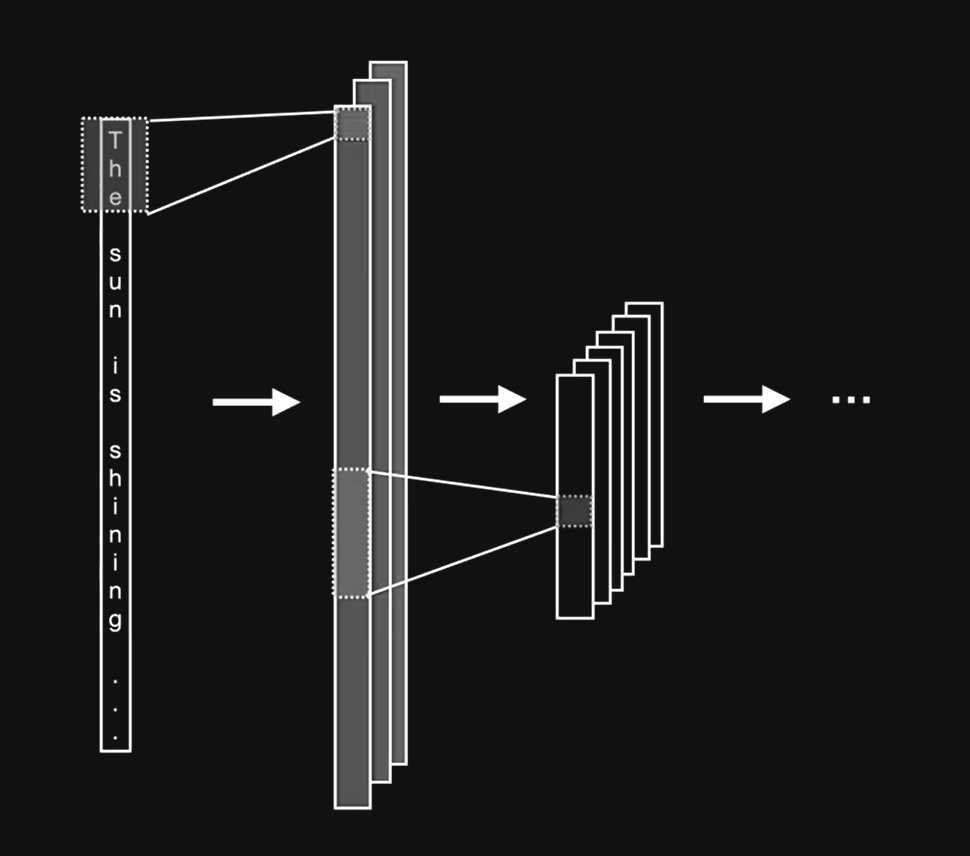

Dirbdami su vaizdais turėjome 2D konvoliucijas, o dabar turime 1D konvoliucijas ir vieną ilgą vektorių kuriame yra mūsų žodžiai paversti tarkime į individualių raidžių simbolių 

### Transformatoriai

Tai modernesnė technika ir apie pačius transformatorius mes kalbėsimės išsamiau šiek tiek vėliau. 2014 metais buvo sukurta technika kuri papildė RNN dėmesio mechanizmais ir kažkas 2017 sugalvojo kad galbūt reikėtų pamėginti atsisakyti pačiu RNN ir panaudoti vien tik dėmesio mechanizmus ir tai davė dar geresnius rezultatus, taip ir atsirado šie taip vadinami <code>**transformatorių modeliai**</code>. `bag of words` metodas gan  gerai dirba su mažso apimties duomenų rinkiniais, RNN reikia jau gerokai didesnių duomenų rinkinių, o transformatorias reika dar didesnių nei reikia RNN. Tipiniu atveju kai tyrėjai dirba su transformatoriais tai naudojami milijardai sakinių įvestis ir treniruojami šie modelia ant šimtų ir tūkstančių GPU branduolių ir tai dar trunka keletą dienų/savaičių ir šis procesas kainuoja beprotiškus pinigus kuriuos gali sau leisti tik didelės kompanijos kaip Google/Amazon/Meta ir pan. Kitas dalykas iš kur gauti etiketės šiems duomenims, tai tipiniu atveju transformatoriai ateiti rankon rankon su savarankiškai prižiūrimo mokymosi tehnika. Tai įvesties duomenų panaudojimo koncepcija generuoti prižiūrimo mokymosi etiketes. Pavydžiui BERT modelis yra du savrankiškai prižiūrimo mokymosi uždaviniai vienas yra tai kad yra užmaskuojama atsitiktinai 15% žodžių ir tada mėginama juos nustatyti/atspėti. Tarkime sakinys: `Šešios žąsys su šešiais žąsyčiais`, užmaskuojame žodį `žasys` ir tada modeli yra taip apmokomas kad sugebėtu nustatyti koks turi būti žodis tokiame sakinyje, tiesiog nustatant didžiuliame žodine visų galimų žodžių tikimybė ir na tikimasi kad žodis `žasys` turės didžiausią tikimybę. Kita technika kuomet iš dokumento pašalinima <code>**2 sakiniai**</code> iš šio dokumento ir iš kito dokumento pašalinamas <code>**1 sakinys**</code>. Ir tada juos tarpusavyje  palygina kad modelis nustatytu iš kurio teksto yra šie sakinys ir kaip juos dera poruoti.

## Sekos modeliavimas su RNN

Kaip galime modifkuoti MLP (daugiasluoksnius perceptronus) kad jie pajėgtu fiksuoti sekos informaciją.

## Įvairių tipų sekos modeliavimo užduotys

## Atgalinis skaičiavimas (backpropagation) per laiką

Tai tas pats algoritmas su kuriuo jau esame pažįstami ir ne kartą naudojome išskyrus tai kad dabar pasižiūrėsime kaip jis veikia jeigu turime laiko dimensiją. 

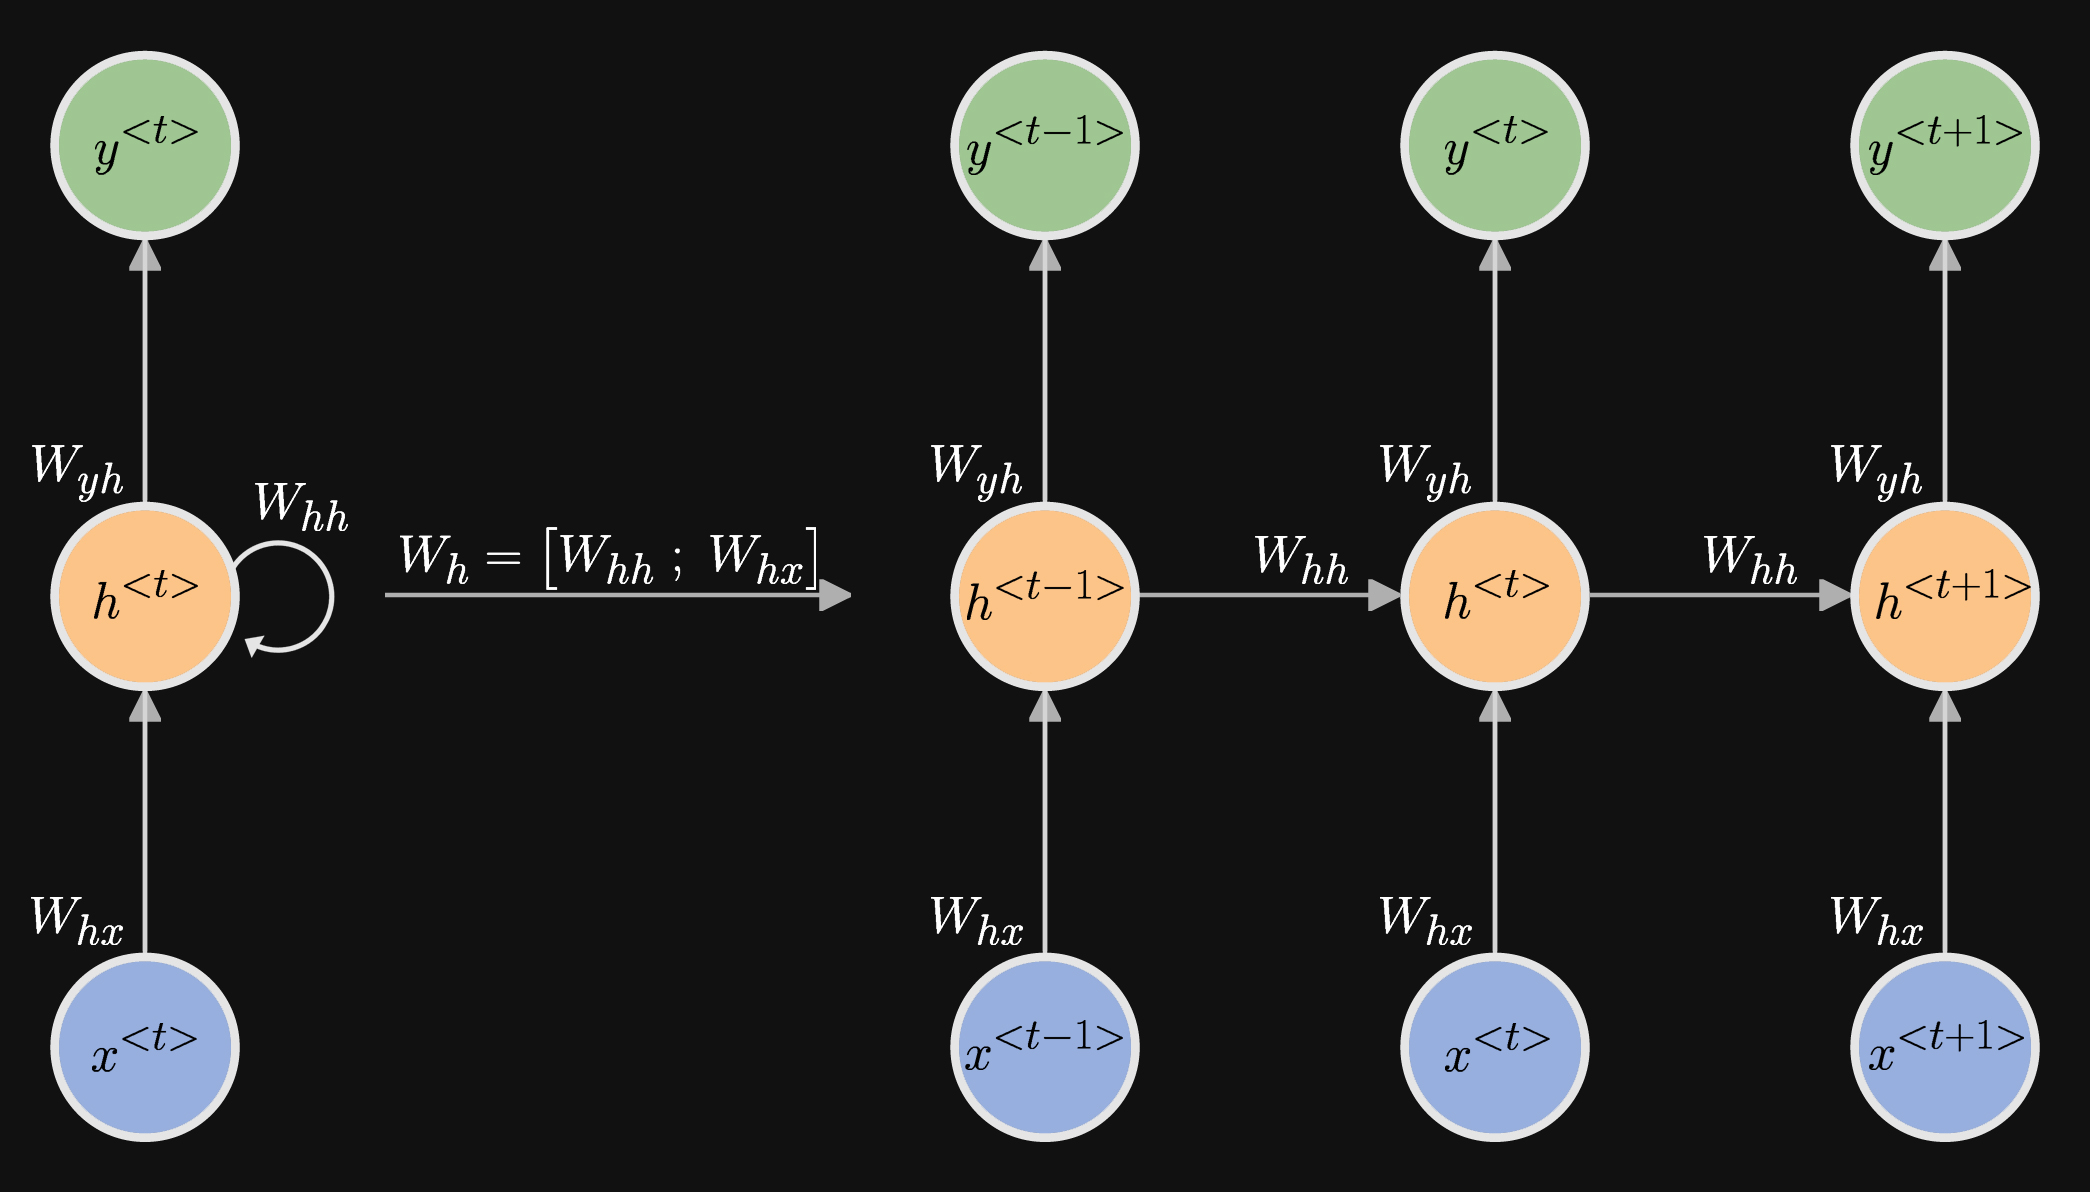

Čia vieno sluoksnio RNN , kairėje pusėje yra kompaktiška notacija kurioje matome įvestį ir išvestį ir paslėptajį sluoksnį su rekurentiniu procesu. Kuo tai skiriasi nuo MLP tai papidlomos svorių matricos:<br>

\begin{multline*}
W_{yh}, W_{hh}, W_{hx}
\end{multline*}

Viena matrica sujungia įvestį su paslėptu sluoksniu, ir kita sujungianti paslėptą sluoksni su išvesties sluoksniu. Tai svoriu matricos kurias naudojame tipiniame daugiasluoksnyje perceptrone. Rekurentinio (pakartotinio) tinklo atveju mes turime papildoma trečia kuri yra iš praeitos paslėptos būsenos. RNN tinkle turime dvi matricas paslėptame sluoksnyje.

\begin{multline*}
W_{h} = 
\begin{bmatrix}
W_{hh} \ ; \ W_hx
\end{bmatrix}
\end{multline*}

Dešinėje diagromos pusėje yra išskleista versija kurioje matosi kad mes pernaudojame šias matricas. Kiekvienu laiko momentu naudojame tas pačias matricas jungiančias įvestį ir paslėptą sluoksnį. Ir tas pačias matricas paslėptame sluoksnyje kiekvienam laiko momentu ir matricas kurios jungia paslėptą sluoksnį su išvestimi. Kuo tai skiriasi nuo MLP tai kad turime W_{hh} matricas. 

<code>**Bendrinė įvestis:**</code>

\begin{multline*}
z^{<t>}_{h} = \mathbf{x^{<t>}}^{\top} \mathbf{W}_{hx} +  \mathbf{h^{<t-1>}}^{\top} \mathbf{W}_{hh}  + \mathbf{b}_{h}
\end{multline*}

    
<code>**Aktivacija:**</code><br>
    
\begin{multline*}
h^{<t>} = \sigma_{h}(\mathbf{z}^{<t>}_{h})
\end{multline*}
    

Skaičiavimai labai panašus išskyrus tai kad turime dvi svorių matricas ir dvi įvestis. Dvejų įvesčių ir dvejų svorių matricų produktų suma plius poslinkis (b). Aktivacijai ar tai būtų sigmoid ar tanh ar ReLU viskas yra tas pats.

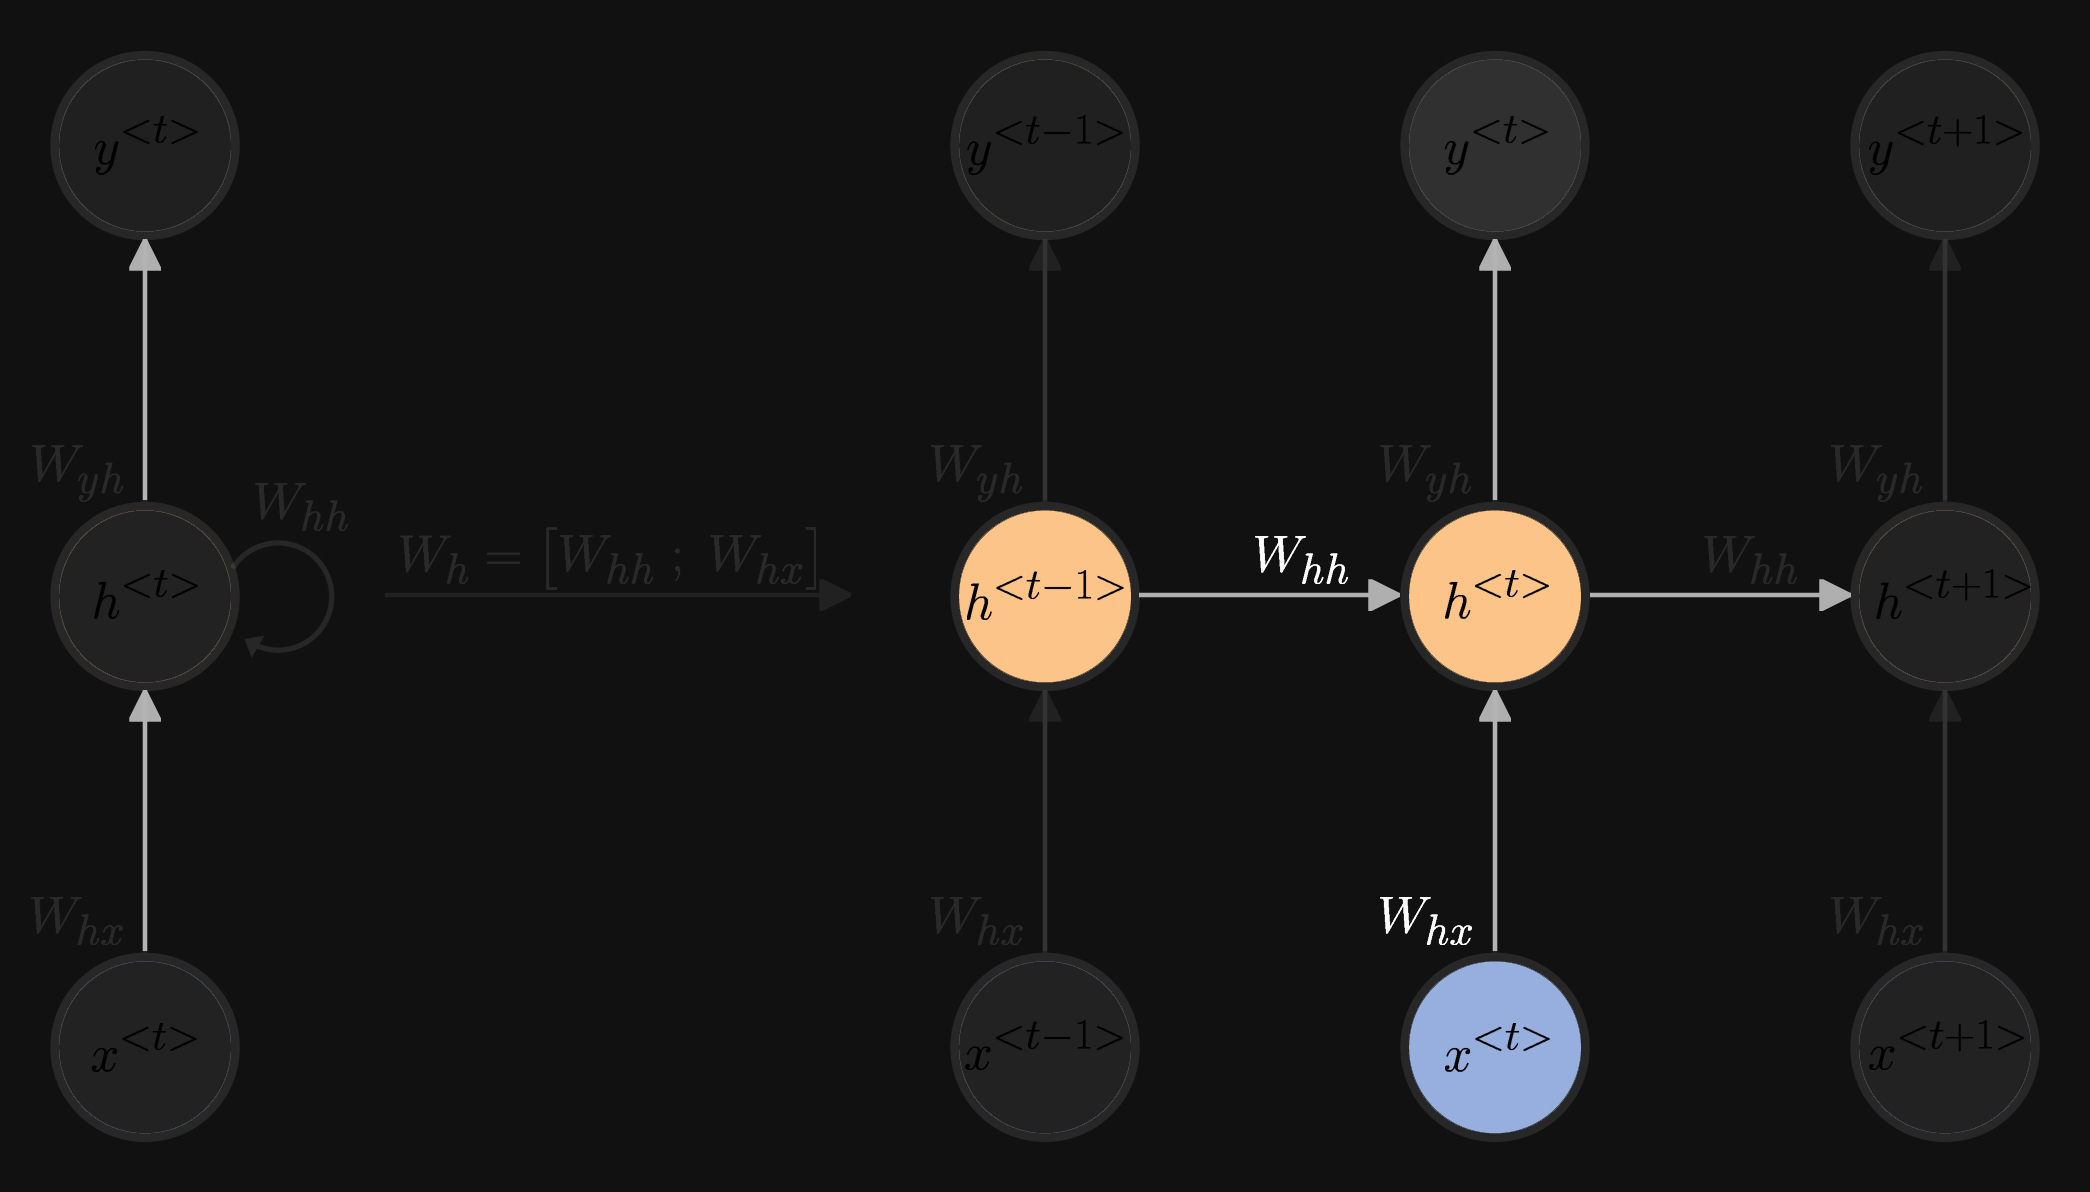

<code>**Bendrinė įvestis:**</code>

\begin{multline*}
z^{<t>}_{y} = \mathbf{h^{<t>}}^{\top} \mathbf{W}_{yh}  + \mathbf{b}_{y}
\end{multline*}

    
<code>**Išvestis:**</code><br>
    
\begin{multline*}
y^{<t>} = \sigma_{y}(\mathbf{z}^{<t>}_{y})
\end{multline*}

Dėl kainos skaičiavimu tai labai priklauso nuo to kokio tipo uždavinys ir koks yra sekos modeliavimo uždavinys. Tarkime jeigu norima nustatyti vieną etiketę duotam tarkyme teksto pavyzdžiui techniškai nereikia skaičiuoti visus kainos funkcijų tik ta kuri yra paskutinė. Bet jeigu mūsų seka yra `many to many` tuomet mums reikia šių visų kainų skaičiavimų. 
Daugiau išsamesnės informacijos apie RNN atgalinį skiačiavime rasite šioje publikacijoje [Backpropagation through time: what it does and how to do it](https://www.researchgate.net/publication/2984354_Backpropagation_through_time_what_it_does_and_how_to_do_it).

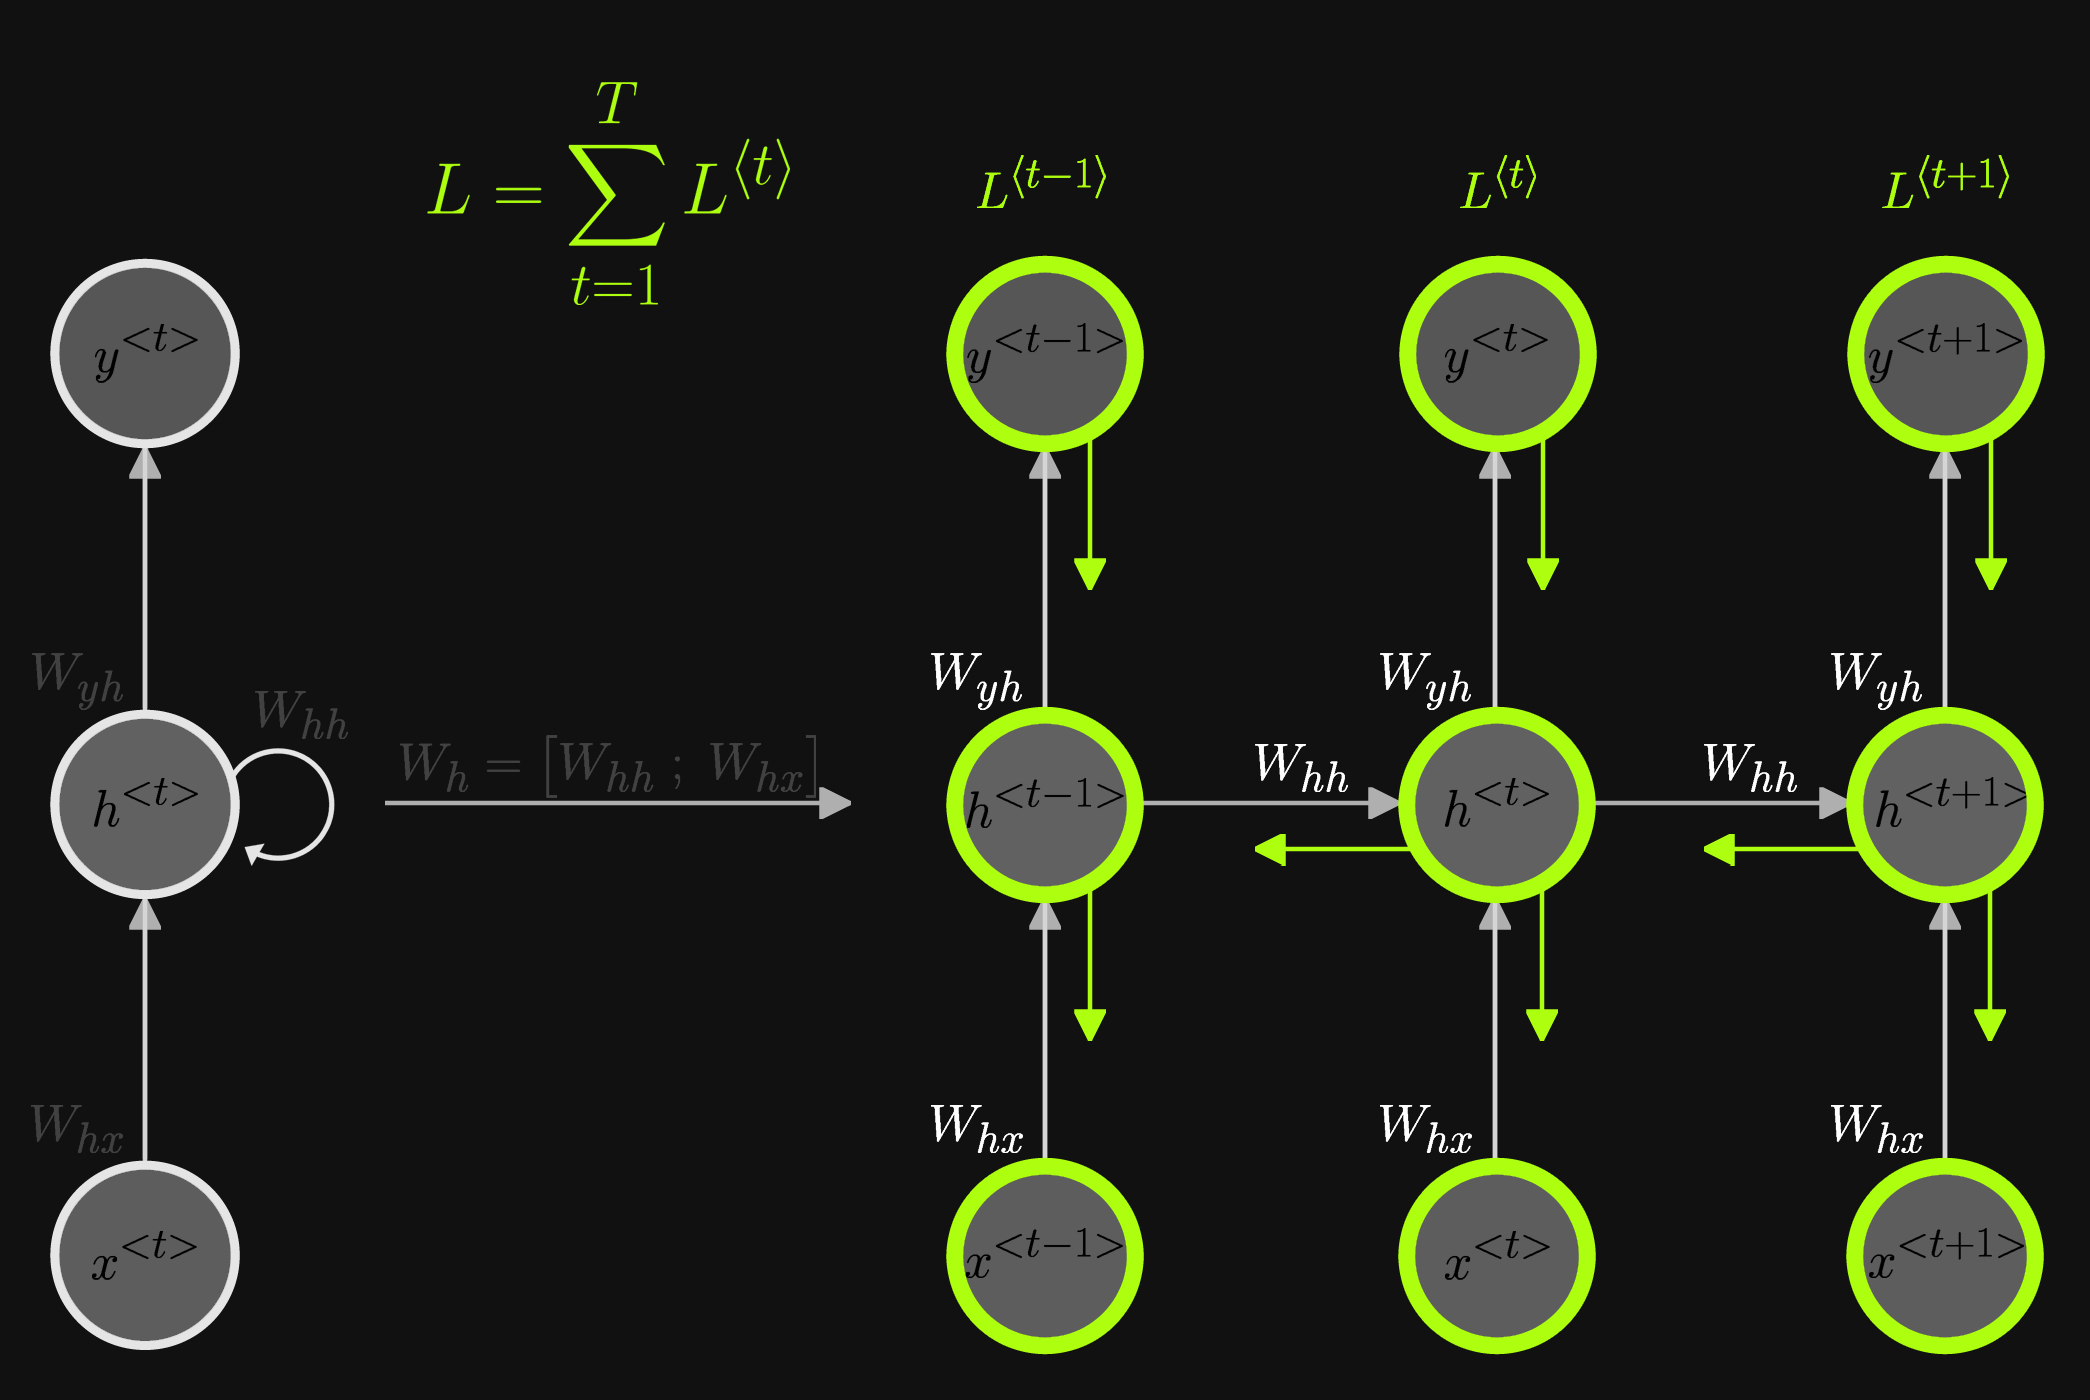

Kaip skaičiuojamas konkrečios kainos gradientas, konkrečiu laiko momentu <t> atsižvelgiant į paslėpto sluoksnio svorių matrica 𝐖ℎℎ. 

\begin{multline*}
L = \sum^{T}_{t=1} L^{(t)}
\end{multline*}

\begin{multline*}
\dfrac{\partial L^{(t)}} {\partial \mathbf{W}_{hh}} =  \dfrac{\partial  L^{(t)}}{\partial y^{(t)}} \cdot \dfrac{\partial y^{(t)}}{\partial \mathbf{h}^{(t)}} \cdot (\sum^{t}_{k=1} \dfrac{\partial \mathbf{h}^{(t)}}{ \partial \mathbf{h}^{(k)}} \cdot \dfrac{\partial \mathbf{h}^{(k)}}{\partial \mathbf{w}_{hh}})
\end{multline*}

Apskaičiuojamas kaip gretimų laiko žingsnių padauginimas. Tai labai problemiška dėl nykstančio ir sprogstančio gradiento problemos jeigu operacijos terminai yra labai maži arba labai dideli.

\begin{multline*}
\dfrac{\partial \mathbf{h}^{(t)}}{ \partial \mathbf{h}^{(k)}} = \prod^{t}_{i = k + 1} \dfrac{\partial\mathbf{h}^{(i)}}{\partial\mathbf{h}^{(i-1)}}
\end{multline*}

## LSTM - ilgalaikė trumpalaikė atmintis

Tai metodas skirtas ilgo nuotolio priklausomybių modeliavimui. LSTM gali laikyti modifikuota RNN versija kuri yra labai veiksminga dirbant su ilgomis sekomis.

### Nykstančio/sprogstančio gradiento problemos sprendimai

Kai kalbėjomės apie MLP ties šia problema tai kaip sprendimas buvo vietoje sigmoid aktivacijos naudoti ReLU aktivacija. Bet praktikoje jeigu MLP turi daugiau paslėptų sluoksnių 2-3 tai jau nebeveiks taip gerai. Spręsti šią problema padeda `BatchNorm` paketo normalizacija. Kaip ir su CNN ši problema ryškiai atsiranda virš 16 sluoksnių, todėl kaip spręndimas atsirada technika kuri praleidžia jungtis `ResNet`. Yra daugybe skirtingų triukų kaip galima spręsti nykstančio/sprogstančio gradiento problemas.
Tik tai kad šios technikos nelabai tinka rekurentiniam neuroniniam tinklui nes mums tai pat reikia vertinti laiko žingsnius, prieš tai buvusias paslėptas būsenas. Yra kelos technikos:

- <code>**Gradiento iškirpimas:**</code> nustatykite maksimalią gradientų vertę, jei jie išauga iki didelių (išsprendžia tik sprogstamojo gradiento problemą)

- <code>**Sutrumpintas atgalinis dauginimasis laikui bėgant (TBPTT):**</code> Tiesiog apriboja laiko žingsnių skaičių, kuriais signalas gali sklisti atgal po kiekvieno praėjimo į priekį. Pvz., net jei seka turi 100 elementų / žingsnių, signalas skaičiuojamas atgal tik maždaug 20 žigsnių.

- <code>**Ilgalaikė trumpalaikė atmintis (LSTM):**</code> naudojama atminties cele ilgo nuotolio priklausomybėms modeliuoti ir išvengti išnykusių gradiento problemų. Daugiau informacijos galima rasti šioje publikacijoje [Long short-term memory](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory). 

- <code>**GRU:**</code> supaprastina LSTM versija.

<code>**LSTM celė**</code>:

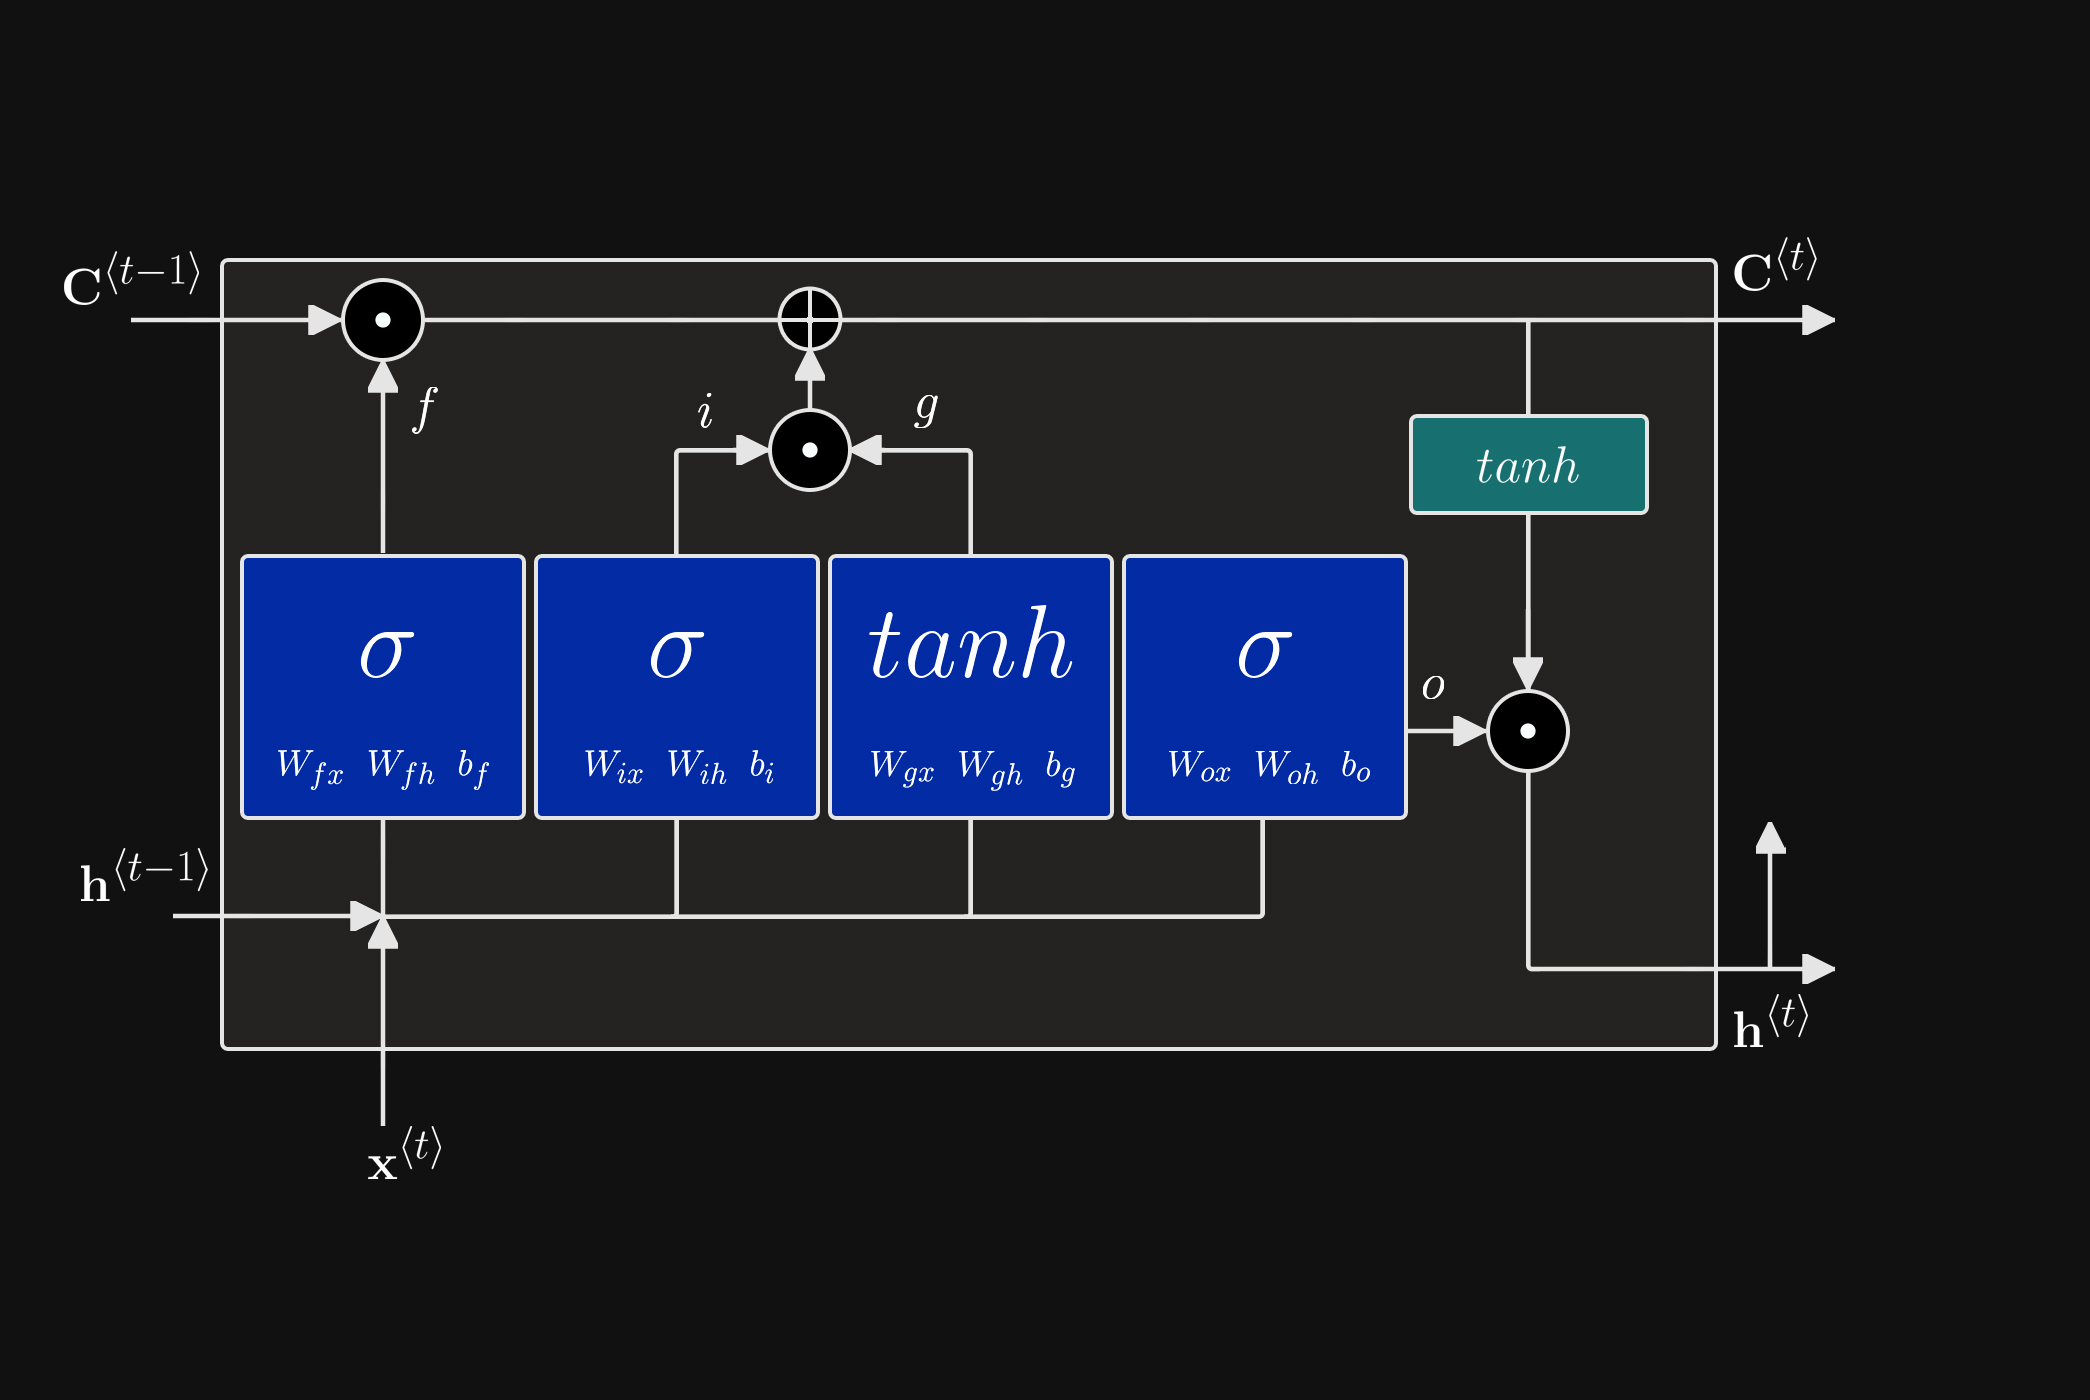

## RNN klasifikavimui: Many to One Word RNN

## Sentimentų klasifikatorius (PyTorch)